In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
ds = tfds.load('stanford_dogs', as_supervised=True)
ds

{'test': <DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>}

In [3]:
ds1 = ds['train'].take(1)

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

원본 Shape:(500, 333, 3) / label: 36
Resized Shape:(224, 224, 3) / label: 36


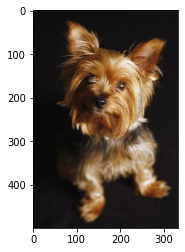

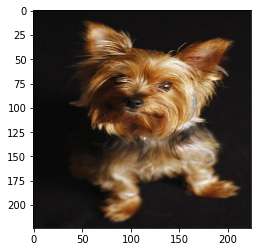

In [6]:
img_size = (224, 224)
for img, label in ds1:
    print("원본 Shape:{} / label: {}".format(img.shape, label))
    plt.imshow(img)
    
    resized_img = np.array(tf.image.resize(img, size=img_size,), dtype=np.int32)
    plt.figure()
    print("Resized Shape:{} / label: {}".format(resized_img.shape, label))
    plt.imshow(resized_img)

In [7]:
def resize_img(img_arr):
    img_size = (224, 224)
    return np.array(tf.image.resize(img_arr, size=img_size), dtype=np.int32)

In [8]:
ds

{'test': <DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>}

In [9]:
train = ds['train']
train

<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [10]:
train = np.array(list(train.as_numpy_iterator()))

In [11]:
train.shape

(12000, 2)

In [39]:
train[0,0].shape # image data

(500, 333, 3)

In [13]:
train[0, 1]

36

In [14]:
x_train, y_train = train[: , 0], train[:, 1]
x_train.shape, y_train.shape

((12000,), (12000,))

In [15]:
y_train.shape

(12000,)

In [16]:
train.shape

(12000, 2)

In [17]:
train.shape

(12000, 2)

In [18]:
train.shape

(12000, 2)

In [91]:
def make_batch():
    count = 0
    batch_size = 120
    while True:
        while True:
            if (count+batch_size) >= len(train):
                data= train[count:, :]
                break
            else:
                data = train[count:count+batch_size, :]

            image_list = []


            for d in data:
                # image = tf.keras.applications.vgg19.preprocess_input(d[0])
                image = resize_img(d[0])
                label = d[1]
                
                image = (image - image.min())/(image.max() - image.min())
                image = tf.keras.applications.vgg19.preprocess_input(image)
                
                image_list.append(image)

            imgs = np.array(image_list, dtype=np.float32)
            print("{}/{}".format(count, len(train)))
            yield imgs, data[:, 1].astype(np.int32)
            count+=(batch_size +1)
        yield imgs, data[:, 1].astype(np.int32)
    return

In [71]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [72]:
x_train[0].shape

(32, 32, 3)

In [73]:
x_train[0:10].shape

(10, 32, 32, 3)

In [74]:
tf.keras.applications.vgg19.preprocess_input(x_train[0]).shape

(32, 32, 3)

In [75]:
# np.load("dogs.npy")

In [76]:
L= tf.keras.layers


In [77]:
import gc
gc.collect() # grabage collector

1928

In [90]:
L= tf.keras.layers
model = tf.keras.Sequential()
# L1
# conv 64
# pool
model.add(
    L.Conv2D(64, (3,3), padding='SAME', activation='relu'),
)

# L2
# conv 128
# pool
model.add(
    L.MaxPooling2D((2,2))
)
model.add(
    L.Conv2D(128, (3,3), padding='same', activation='relu')
)
model.add(
    L.MaxPooling2D((2,2))
)

# conv 256*2
# maxpool
model.add(
    L.Conv2D(256, (3,3), padding='same', activation='relu')
)
model.add(
    L.Conv2D(256, (3,3), padding='same', activation='relu')
)
model.add(
    L.MaxPooling2D((2,2))
)

# (conv512
# pool)
# *2
model.add(
    L.Conv2D(512, (3,3), padding='same', activation='relu')
)
model.add(
    L.MaxPooling2D((2,2))
)
model.add(
    L.Conv2D(512, (3,3), padding='same', activation='relu')
)
model.add(
    L.MaxPooling2D((2,2))
)

model.add(
    L.Flatten()
)
# fc 4096 *2 
model.add(
    L.Dense(4096, activation='relu'),
)
model.add(
    L.Dense(4096, activation='relu'),

)

# fc 1000
model.add(
    L.Dense(1000, activation='relu')
)
# softmax
#
model.add(
    L.Dense(120, activation='softmax')
)

sgd = tf.keras.optimizers.SGD()

model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(make_batch(), epochs=1, verbose=2,)

0/12000
121/12000
242/12000
363/12000
484/12000
605/12000
726/12000
847/12000
968/12000
1089/12000
1210/12000
1331/12000
1452/12000
1573/12000
1694/12000
1815/12000
1936/12000
2057/12000
2178/12000
2299/12000
2420/12000
2541/12000
2662/12000
2783/12000
2904/12000
3025/12000
3146/12000
3267/12000
3388/12000
3509/12000
3630/12000
3751/12000
3872/12000
3993/12000
4114/12000
4235/12000
4356/12000
4477/12000
4598/12000
4719/12000
4840/12000
4961/12000
5082/12000
5203/12000
5324/12000
5445/12000
5566/12000
5687/12000
5808/12000
5929/12000
6050/12000
6171/12000
6292/12000
6413/12000
6534/12000
6655/12000
6776/12000
6897/12000
7018/12000
7139/12000
7260/12000
7381/12000
7502/12000
7623/12000
7744/12000
7865/12000
7986/12000
8107/12000
8228/12000
8349/12000
8470/12000
8591/12000
8712/12000
8833/12000
8954/12000
9075/12000
9196/12000
9317/12000
9438/12000
9559/12000
9680/12000
9801/12000
9922/12000
10043/12000
10164/12000
10285/12000
10406/12000
10527/12000
10648/12000
10769/12000
10890/12000
11

InvalidArgumentError: ignored

In [92]:
adam = tf.keras.optimizers.Adam()
model.compile(adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'], )

In [93]:
model.fit_generator(make_batch(), epochs=10, verbose=2,)


0/12000
Epoch 1/10
121/12000
242/12000
363/12000
484/12000
605/12000
726/12000
847/12000
968/12000
1089/12000
1210/12000
1331/12000
1452/12000
1573/12000
1694/12000
1815/12000
1936/12000
2057/12000
2178/12000
2299/12000
2420/12000
2541/12000
2662/12000
2783/12000
2904/12000
3025/12000
3146/12000
3267/12000
3388/12000
3509/12000
3630/12000
3751/12000
3872/12000
3993/12000
4114/12000
4235/12000
4356/12000
4477/12000
4598/12000
4719/12000
4840/12000
4961/12000
5082/12000
5203/12000
5324/12000
5445/12000
5566/12000
5687/12000
5808/12000
5929/12000
6050/12000
6171/12000
6292/12000
6413/12000
6534/12000
6655/12000
6776/12000
6897/12000
7018/12000
7139/12000
7260/12000
7381/12000
7502/12000
7623/12000
7744/12000
7865/12000
7986/12000
8107/12000
8228/12000
8349/12000
8470/12000
8591/12000
8712/12000
8833/12000
8954/12000
9075/12000
9196/12000
9317/12000
9438/12000
9559/12000
9680/12000
9801/12000
9922/12000
10043/12000
10164/12000
10285/12000
10406/12000
10527/12000
10648/12000
10769/12000
108

InvalidArgumentError: ignored

In [87]:
model.history.history

{'accuracy': [0.00614478113129735], 'loss': [4.938971519470215]}

In [80]:
model.evaluate(make_batch())

0/12000
      1/Unknown - 0s 15us/step - loss: 4.7934 - accuracy: 0.0000e+00121/12000
      2/Unknown - 1s 288ms/step - loss: 4.7864 - accuracy: 0.0167   242/12000
      3/Unknown - 1s 383ms/step - loss: 4.7848 - accuracy: 0.0139363/12000
      4/Unknown - 2s 432ms/step - loss: 4.7858 - accuracy: 0.0146484/12000
      5/Unknown - 2s 460ms/step - loss: 4.7873 - accuracy: 0.0133605/12000
      6/Unknown - 3s 478ms/step - loss: 4.7868 - accuracy: 0.0111726/12000
      7/Unknown - 3s 492ms/step - loss: 4.7864 - accuracy: 0.0119847/12000
      8/Unknown - 4s 501ms/step - loss: 4.7865 - accuracy: 0.0104968/12000
      9/Unknown - 5s 510ms/step - loss: 4.7864 - accuracy: 0.01021089/12000
     10/Unknown - 5s 515ms/step - loss: 4.7865 - accuracy: 0.01081210/12000
     11/Unknown - 6s 522ms/step - loss: 4.7866 - accuracy: 0.00981331/12000
     12/Unknown - 6s 526ms/step - loss: 4.7866 - accuracy: 0.00971452/12000
     13/Unknown - 7s 529ms/step - loss: 4.7869 - accuracy: 0.00901573/12000
     1

[4.788015365600586, 0.008333333767950535]

In [57]:
model = tf.keras.Sequential()
model.
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='SAME', activation='relu'))
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(120, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(make_batch(), epochs=1, verbose=2,)

0/12000
301/12000
602/12000
903/12000
1204/12000
1505/12000
1806/12000
2107/12000
2408/12000
2709/12000
3010/12000
3311/12000
3612/12000
3913/12000
4214/12000
4515/12000
4816/12000
5117/12000
5418/12000
5719/12000
6020/12000
6321/12000
6622/12000
6923/12000
7224/12000
7525/12000
7826/12000
8127/12000
8428/12000
8729/12000
9030/12000
9331/12000
9632/12000
9933/12000
10234/12000
10535/12000
10836/12000
11137/12000
11438/12000
39/39 - 52s - loss: 4876.9556 - accuracy: 0.0073


In [58]:
model.evaluate(make_batch())

0/12000
      1/Unknown - 0s 20us/step - loss: 441.1694 - accuracy: 0.0100301/12000
      2/Unknown - 1s 616ms/step - loss: 462.2776 - accuracy: 0.0117602/12000
      3/Unknown - 2s 823ms/step - loss: 482.0597 - accuracy: 0.0111903/12000
      4/Unknown - 4s 926ms/step - loss: 498.3832 - accuracy: 0.00921204/12000
      5/Unknown - 5s 992ms/step - loss: 508.5700 - accuracy: 0.00801505/12000
      6/Unknown - 6s 1s/step - loss: 515.6808 - accuracy: 0.0078   1806/12000
      7/Unknown - 7s 1s/step - loss: 521.2032 - accuracy: 0.00902107/12000
      8/Unknown - 9s 1s/step - loss: 524.2827 - accuracy: 0.00792408/12000
      9/Unknown - 10s 1s/step - loss: 526.8333 - accuracy: 0.00812709/12000
     10/Unknown - 11s 1s/step - loss: 530.5414 - accuracy: 0.00803010/12000
     11/Unknown - 12s 1s/step - loss: 530.4144 - accuracy: 0.00793311/12000
     12/Unknown - 14s 1s/step - loss: 533.9163 - accuracy: 0.00753612/12000
     13/Unknown - 15s 1s/step - loss: 532.5291 - accuracy: 0.00743913/1200

[531.0010986328125, 0.008461538702249527]

In [130]:
## Cifar

In [53]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [54]:
# VGGNET
model = tf.Sequential()
model.add()

AttributeError: ignored

In [117]:
# data source: http://vision.stanford.edu/aditya86/ImageNetDogs/

In [118]:
x_train

array([array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]]),
       array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0.

In [17]:
img_arr = np.array([resize_img(img)for img in x_train])

KeyboardInterrupt: ignored

In [ ]:
img_list = []
for img in x_train:
    img_list.append(resize_img(img))